In [1]:
from sys import path
from pathlib import Path

ROOT = Path().resolve().parent
if str(ROOT) not in path:
    path.insert(0, str(ROOT))
    print(f"Added {ROOT} to sys.path")

Added /Users/surelmanda/Data-Science-Projects/batchtrainingbooster/src/batchtrainingbooster to sys.path


In [2]:
from batchtrainingbooster.utils.dataset_loader import (
    get_dataset_path,
    load_dataset,
    get_data_split,
)

dataset_path = get_dataset_path("data/multiclass_dataset")
df = load_dataset(dataset_path)

print(f"Loaded dataset: {dataset_path.name}, shape = {df.shape}")
df.head()

Loaded dataset: ObesityDataset.csv, shape = (2111, 17)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
train_df = get_data_split("train")
print(f"Loaded training dataset: shape = {train_df.shape}")
display(train_df.head())


test_df = get_data_split("test")
print(f"Loaded test dataset: shape = {test_df.shape}")
display(test_df.head())


columns_todrop = ["Name", "PassengerId"]
train_df = train_df.drop(columns=columns_todrop)
test_df = test_df.drop(columns=columns_todrop)

print(
    f"Training dataset shape after dropping columns {columns_todrop}: {train_df.shape}"
)
print(f"Test dataset shape after dropping columns {columns_todrop}: {test_df.shape}")

Loaded training dataset: shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Loaded test dataset: shape = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Training dataset shape after dropping columns ['Name', 'PassengerId']: (891, 10)
Test dataset shape after dropping columns ['Name', 'PassengerId']: (418, 9)


In [4]:
from utils.dataset_preprocessor import make_train_valid_split, to_spark_dfs

print("Splitting training data into train and validation sets...")
train_df, valid_df = make_train_valid_split(
    train_df, target="Survived", train_size=0.8, val_size=0.2, random_state=42
)
print(f"Train set shape: {train_df.shape}, Validation set shape: {valid_df.shape}")

print("Converting pandas DataFrames to Spark DataFrames...")
spark_train_df, spark_valid_df = to_spark_dfs(train_df, valid_df)

Splitting training data into train and validation sets...
[SPLIT] Train shape: (712, 10) | Validation shape: (179, 10)
Train set shape: (712, 10), Validation set shape: (179, 10)
Converting pandas DataFrames to Spark DataFrames...


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/06 18:02:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[SPARK] Conversion successful → Spark DataFrames created.


[SPARK] Train rows: 712 | Validation rows: 179


2025-09-06 18:02:40,002 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for validation.


Importing XGBoostTrainer
XGBoostTrainer imported and instantiated successfully: <trainers.xgboost_trainer.XGBoostTrainer object at 0x14c3b85d0>
===== Configuration XGBoost =====
{'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'n_estimators': 600,
 'learning_rate': 0.05,
 'max_depth': 6,
 'reg_lambda': 3.0,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'random_state': 42,
 'verbose': 10,
 'early_stopping_rounds': 10}
Applying fit method


2025-09-06 18:02:41,115 - batchtrainingbooster.core.base_trainer - INFO - Categorical features detected - Enabling categorical support
2025-09-06 18:02:41,116 - batchtrainingbooster.core.base_trainer - INFO - Starting XGBoost training with 3 batches
2025-09-06 18:02:41,116 - batchtrainingbooster.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-06 18:02:41,116 - batchtrainingbooster.core.base_trainer - INFO - Creating batches...
2025-09-06 18:02:41,254 - batchtrainingbooster.core.base_trainer - INFO - Created 3 batches stratified by Survived
2025-09-06 18:02:41,254 - batchtrainingbooster.core.base_trainer - INFO - Batches created successfully.
2025-09-06 18:02:41,255 - batchtrainingbooster.core.base_trainer - INFO - Batches created and applied to DataFrame.
2025-09-06 18:02:41,255 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 0
2025-09-06 18:02:41,281 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataF

[0]	validation_0-logloss:0.65058	validation_1-logloss:0.67692
[1]	validation_0-logloss:0.61716	validation_1-logloss:0.66398
[2]	validation_0-logloss:0.58715	validation_1-logloss:0.65532
[3]	validation_0-logloss:0.56606	validation_1-logloss:0.64561
[4]	validation_0-logloss:0.54080	validation_1-logloss:0.63395
[5]	validation_0-logloss:0.52021	validation_1-logloss:0.62463
[6]	validation_0-logloss:0.49922	validation_1-logloss:0.61585
[7]	validation_0-logloss:0.48222	validation_1-logloss:0.60188
[8]	validation_0-logloss:0.46661	validation_1-logloss:0.59952
[9]	validation_0-logloss:0.45164	validation_1-logloss:0.59392
[10]	validation_0-logloss:0.44330	validation_1-logloss:0.58959
[11]	validation_0-logloss:0.43253	validation_1-logloss:0.58601
[12]	validation_0-logloss:0.41929	validation_1-logloss:0.57655
[13]	validation_0-logloss:0.40921	validation_1-logloss:0.57233
[14]	validation_0-logloss:0.40082	validation_1-logloss:0.56443
[15]	validation_0-logloss:0.39169	validation_1-logloss:0.55855
[1

/Users/surelmanda/Data-Science-Projects/batchtrainingbooster/.venv/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [18:02:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[39]	validation_0-logloss:0.27068	validation_1-logloss:0.51319
[40]	validation_0-logloss:0.26735	validation_1-logloss:0.51185
[41]	validation_0-logloss:0.26435	validation_1-logloss:0.51244
[42]	validation_0-logloss:0.26207	validation_1-logloss:0.51281
[43]	validation_0-logloss:0.25905	validation_1-logloss:0.51279
[44]	validation_0-logloss:0.25638	validation_1-logloss:0.51285
[45]	validation_0-logloss:0.25476	validation_1-logloss:0.51243
[46]	validation_0-logloss:0.25166	validation_1-logloss:0.51257
[47]	validation_0-logloss:0.24869	validation_1-logloss:0.51113
[48]	validation_0-logloss:0.24625	validation_1-logloss:0.50889
[49]	validation_0-logloss:0.24334	validation_1-logloss:0.50891
[50]	validation_0-logloss:0.24109	validation_1-logloss:0.50746
[51]	validation_0-logloss:0.23876	validation_1-logloss:0.50773
[52]	validation_0-logloss:0.23554	validation_1-logloss:0.50723
[53]	validation_0-logloss:0.23285	validation_1-logloss:0.50590
[54]	validation_0-logloss:0.23130	validation_1-logloss:

2025-09-06 18:02:44,209 - batchtrainingbooster.core.base_trainer - INFO - Batch 1 - Train: 0.20897 | Valid: 0.51020
2025-09-06 18:02:44,212 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.51020 (improvement: inf)
2025-09-06 18:02:44,214 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 1
2025-09-06 18:02:44,247 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 1
2025-09-06 18:02:45,633 - batchtrainingbooster.core.base_trainer - INFO - Processing batch 2/3
2025-09-06 18:02:45,634 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 2
2025-09-06 18:02:45,638 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 2: 0.025000
2025-09-06 18:02:45,638 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training XGBoost on batch 2


[0]	validation_0-logloss:0.50560	validation_1-logloss:0.50766
[1]	validation_0-logloss:0.50286	validation_1-logloss:0.50751
[2]	validation_0-logloss:0.49958	validation_1-logloss:0.50754
[3]	validation_0-logloss:0.49626	validation_1-logloss:0.50724
[4]	validation_0-logloss:0.49315	validation_1-logloss:0.50677
[5]	validation_0-logloss:0.49110	validation_1-logloss:0.50634
[6]	validation_0-logloss:0.48811	validation_1-logloss:0.50642
[7]	validation_0-logloss:0.48621	validation_1-logloss:0.50612
[8]	validation_0-logloss:0.48311	validation_1-logloss:0.50585
[9]	validation_0-logloss:0.48031	validation_1-logloss:0.50658
[10]	validation_0-logloss:0.47734	validation_1-logloss:0.50511
[11]	validation_0-logloss:0.47461	validation_1-logloss:0.50412
[12]	validation_0-logloss:0.47126	validation_1-logloss:0.50354
[13]	validation_0-logloss:0.46925	validation_1-logloss:0.50318
[14]	validation_0-logloss:0.46713	validation_1-logloss:0.50296
[15]	validation_0-logloss:0.46462	validation_1-logloss:0.50261
[1

/Users/surelmanda/Data-Science-Projects/batchtrainingbooster/.venv/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [18:02:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()
2025-09-06 18:02:45,752 - batchtrainingbooster.core.base_trainer - INFO - Batch 2 - Train: 0.42005 | Valid: 0.50089
2025-09-06 18:02:45,755 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.50089 (improvement: 0.00931)
2025-09-06 18:02:45,758 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 2
2025-09-06 18:02:45,861 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 2
2025-09-06 18:02:47,485 - batchtrainingbooster.core.base_trainer - INFO - Processing batch 3/3
2025-09-06 18:02:47,486 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 3
202

[0]	validation_0-logloss:0.45676	validation_1-logloss:0.50274
[1]	validation_0-logloss:0.45594	validation_1-logloss:0.50330
[2]	validation_0-logloss:0.45508	validation_1-logloss:0.50394
[3]	validation_0-logloss:0.45423	validation_1-logloss:0.50451
[4]	validation_0-logloss:0.45353	validation_1-logloss:0.50512
[5]	validation_0-logloss:0.45270	validation_1-logloss:0.50575
[6]	validation_0-logloss:0.45211	validation_1-logloss:0.50581
[7]	validation_0-logloss:0.45137	validation_1-logloss:0.50640
[8]	validation_0-logloss:0.45062	validation_1-logloss:0.50702
[9]	validation_0-logloss:0.44983	validation_1-logloss:0.50768


/Users/surelmanda/Data-Science-Projects/batchtrainingbooster/.venv/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [18:02:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()
2025-09-06 18:02:47,527 - batchtrainingbooster.core.base_trainer - INFO - Batch 3 - Train: 0.44902 | Valid: 0.50850
2025-09-06 18:02:47,530 - batchtrainingbooster.core.base_trainer - INFO - ⏳ No improvement - Patience: 1/5


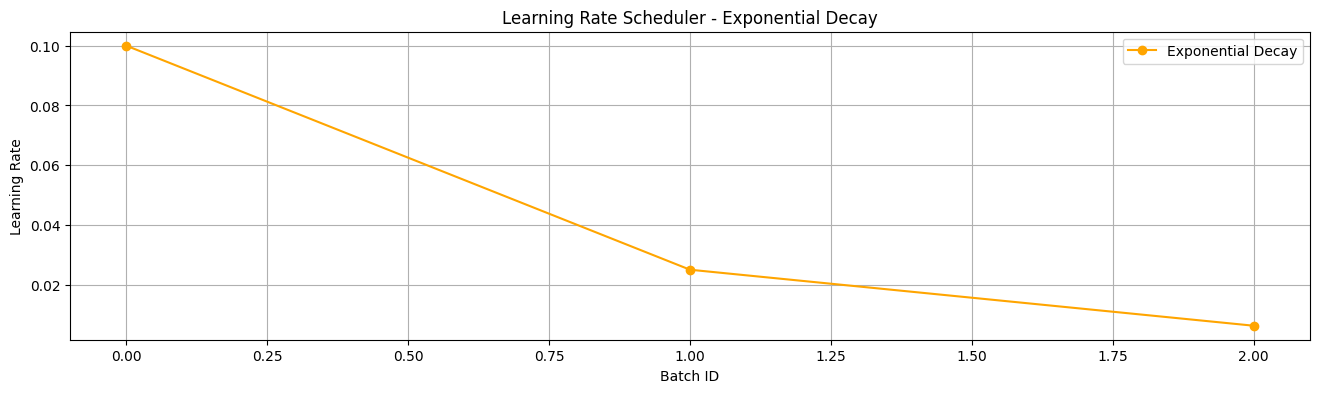

2025-09-06 18:02:47,927 - batchtrainingbooster.core.base_trainer - INFO - Plotting learning curve of XGBoost model...


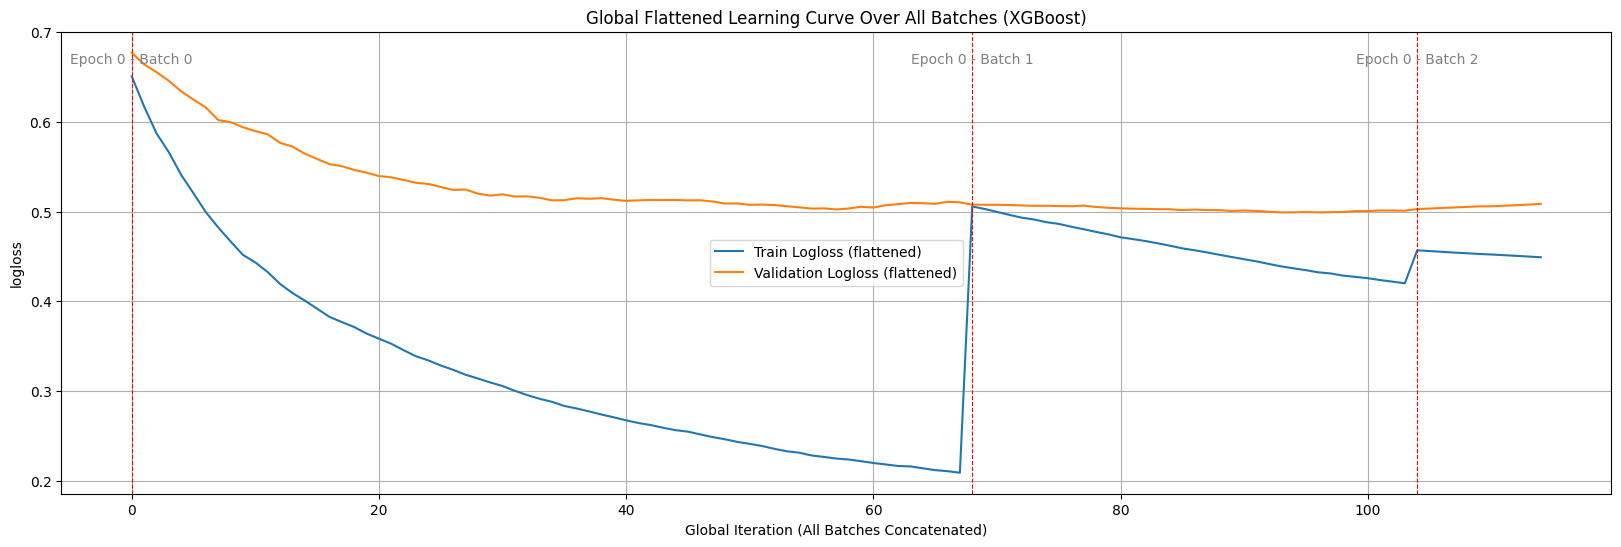

2025-09-06 18:02:48,011 - batchtrainingbooster.core.base_trainer - INFO - Learning curve plotted successfully.
2025-09-06 18:02:48,014 - batchtrainingbooster.core.base_trainer - INFO - Training completed successfully!
2025-09-06 18:02:48,014 - batchtrainingbooster.core.base_trainer - INFO - Total batches processed: 3
2025-09-06 18:02:48,015 - batchtrainingbooster.core.base_trainer - INFO - Best validation loss: 0.50089
2025-09-06 18:02:48,015 - batchtrainingbooster.core.base_trainer - INFO - Using best model


In [ ]:
import pprint
from trainers.xgboost_trainer import XGBoostTrainer


print("Importing XGBoostTrainer")
trainer = XGBoostTrainer()
print("XGBoostTrainer imported and instantiated successfully:", trainer)

target_column = "Survived"

# Binaire
config_model = {
    "objective": "binary:logistic",  # classification binaire
    "eval_metric": "logloss",  # ["auc", "logloss"],  # suivre AUC et logloss
    "n_estimators": 600,  # équivalent à iterations
    "learning_rate": 0.05,
    "max_depth": 6,
    "reg_lambda": 3.0,  # l2_leaf_reg -> reg_lambda
    "subsample": 0.8,
    "colsample_bytree": 0.8,  # sous-échantillonnage des features
    "random_state": 42,
    # "verbosity": 1,                   # 0 = silent, 1 = warnings
    # "verbose": 10,                   # 0 = silent, 1 = warnings
    "early_stopping_rounds": 10,  # géré via fit()
}

config_lr_scheduler = {
    "initial_lr": 0.1,
    "decay_rate": 0.25,
}

print("===== Configuration XGBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    num_batches=3,
    config_model=config_model,
    config_lr_scheduler=config_lr_scheduler,
)